In [1]:
import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.svm import SVC

In [2]:

def load_images_from_folder(folder):
    """
    This function will take a folder as input and read all the images category vice.
    
    """

    images = {}
    for filename in os.listdir(folder):
        category = []
        path = folder + "/" + filename
        for cat in os.listdir(path):
            img = cv2.imread(path + "/" + cat,0)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            if img is not None:
                category.append(img)
        images[filename] = category
    return images

In [3]:
images = load_images_from_folder('Objects_Dataset_Images-20230310T100717Z-001/Objects_Dataset_Images/train')  # take all images category by category 
test = load_images_from_folder('Objects_Dataset_Images-20230310T100717Z-001/Objects_Dataset_Images/test') # take test images 

In [4]:
def sift_features(images):
    """
    This function will create sift features for the images
    """
    class_names = list(images.keys())
    sift_vectors = dict()
    for i in range(len(class_names)):
        sift_vectors[class_names[i]] = i
    
    tags = []
    descriptor_list = []
    sift = cv2.SIFT_create()
    for key,value in images.items():
        features = []
        for img in value:
            kp, des = sift.detectAndCompute(img,None)
           
            descriptor_list.extend(des)
            all_tags = [sift_vectors[key] for _ in range(len(des))]
            tags.extend(all_tags)
        #     features.append(des)
        # sift_vectors[key] = features
    return [descriptor_list, tags]

In [5]:
sifts = sift_features(images) 

In [6]:
# Training a support vector classifier on the data
svc = SVC()
svc.fit(sifts[0], sifts[1])

SVC()

In [31]:
def make_prediction(image_sift, classifier):
    """
    This function will take an image as input and return the prediction made by classifier on that image.
    """
    # sift = cv2.SIFT_create()
    # kp, des = sift.detectAndCompute(image,None)
    prediction = classifier.predict(image_sift)
    prediction = np.bincount(prediction).argmax()
    return prediction

In [28]:
# making prediction on an image using the svc
a_test_image = test["Soccer_Ball"][1]
p = make_prediction(a_test_image, svc)
list(test.keys())[p]

'Soccer_Ball'

In [15]:
# training a random forest classifier on the same data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(sifts[0], sifts[1])

RandomForestClassifier()

In [18]:
#making prediction on an image using the svc

a_test_image = test["accordian"][0]
p = make_prediction(a_test_image, rfc)
list(test.keys())[p]

'accordian'

In [29]:
def get_accuracy(classifier, images):
    tags = dict()
    all_classes = list(images.keys())
    for c in range(len(all_classes)):
        tags[all_classes[c]] = c 
    
    original_tags = []
    predicted_tags = []

    sift = cv2.SIFT_create()
    for key, value in images.items():
        features = []
        for img in value:
            kp, des = sift.detectAndCompute(img,None)
            p = make_prediction(des, classifier)
            predicted_tags.append(p)
            original_tags.append(tags[key])
    return original_tags, predicted_tags

In [35]:
ot, pt = get_accuracy(rfc, test)

In [36]:
from sklearn.metrics import accuracy_score, r2_score
print("The Accuracy of Random Forest Classifier:")
print("Accuracy:", accuracy_score(ot, pt))
print("R2-Score:", r2_score(ot, pt))

    # 

Accuracy: 0.625
R2-Score: -0.7


In [40]:
ot, pt = get_accuracy(svc, test)
print("The Accuracy of Support Vector Classifier:")
print("Accuracy:", accuracy_score(ot, pt))
print("R2-Score:", r2_score(ot, pt))

The Accuracy of Support Vector Classifier:
Accuracy: 0.75
R2-Score: 0.5


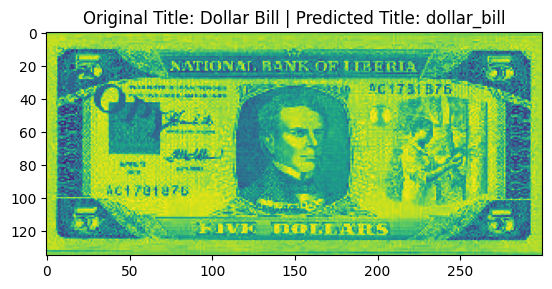

In [48]:
# Inference of single image using RFC
import matplotlib.pyplot as plt
%matplotlib inline
sift = cv2.SIFT_create()
an_image = test["dollar_bill"][0]
plt.imshow(an_image);
kp, des = sift.detectAndCompute(an_image,None)
pred = list(test.keys())[make_prediction(des, rfc)]
plt.title(f'Original Title: dollar_bill | Predicted Title: {pred}');

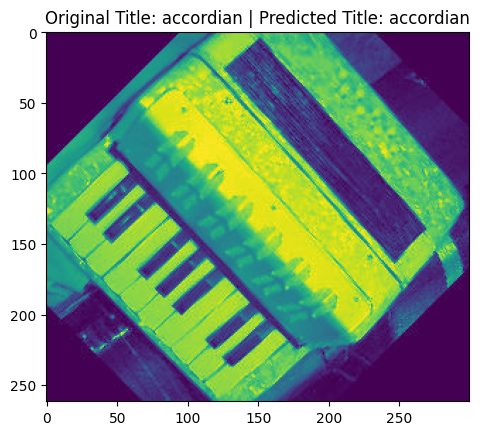

In [49]:
# Inference of single image using RFC
import matplotlib.pyplot as plt
%matplotlib inline
sift = cv2.SIFT_create()
an_image = test["accordian"][0]
plt.imshow(an_image);
kp, des = sift.detectAndCompute(an_image,None)
pred = list(test.keys())[make_prediction(des, rfc)]
plt.title(f'Original Title: accordian | Predicted Title: {pred}');

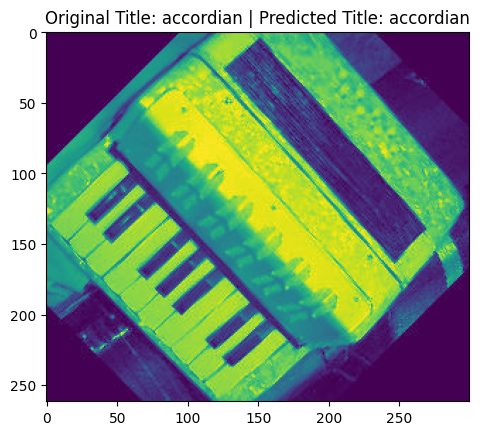

In [50]:
# Inference of single image using SVC
import matplotlib.pyplot as plt
%matplotlib inline
sift = cv2.SIFT_create()
an_image = test["accordian"][0]
plt.imshow(an_image);
kp, des = sift.detectAndCompute(an_image,None)
pred = list(test.keys())[make_prediction(des, svc)]
plt.title(f'Original Title: accordian | Predicted Title: {pred}');

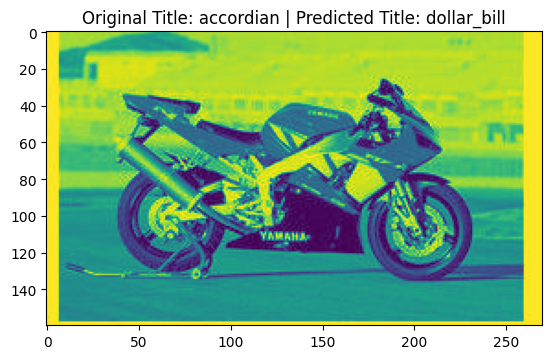

In [51]:
# Inference of single image using SVC
import matplotlib.pyplot as plt
%matplotlib inline
sift = cv2.SIFT_create()
an_image = test["motorbike"][0]
plt.imshow(an_image);
kp, des = sift.detectAndCompute(an_image,None)
pred = list(test.keys())[make_prediction(des, svc)]
plt.title(f'Original Title: accordian | Predicted Title: {pred}');